# CASE DATA SCIENCE IBOPE
### Candidato: Juan CR Soto Sotelo

1. Segmentar os municípios brasileiros para a estratégia de entrada de  uma multinacional varejista
2. Determinar os municípios que deveriam ser a porta de entrada para empresa
3. Elaborar um modelo de classificação para o cálculo da probabilidade de um determinado município pertencer a um dos grupos criados.

## Dados : Informações Municipais

In [2]:
#IMPORTACAO DOS DADOS
library(readxl)
Case_Data_Science_IBOPE <- read_excel("Case - Data Science IBOPE.XLS", 
                                      sheet = "Informações_Municipais", range = "A4:Y5511")

In [6]:
#LISTA DAS VARIAVEIS
print(names(Case_Data_Science_IBOPE))

 [1] "Código"                                                               
 [2] "Município"                                                            
 [3] "Área (km²)"                                                           
 [4] "Densidade demográfica, 2000"                                          
 [5] "Distância à capital (km)"                                             
 [6] "Esperança de vida ao nascer, 2000"                                    
 [7] "Mortalidade até um ano de idade, 2000"                                
 [8] "Taxa de fecundidade total, 2000"                                      
 [9] "Percentual de pessoas de 25 anos ou mais analfabetas, 2000"           
[10] "Renda per Capita, 2000"                                               
[11] "Índice de Gini, 2000"                                                 
[12] "Intensidade da indigência, 2000"                                      
[13] "Intensidade da pobreza, 2000"                                         

1. 5507 municípios e 25 variáveis demográficas
2. Variáveis com diferentes magnitude e unidades de medida,
3. Nenhum registro vazio (missing).
4. Passo prévio : redução da dimensionalidade -> 9 componentes
5. Clusters : 5 agrupamentos

In [3]:
pc.cr <- princomp(Case_Data_Science_IBOPE[, -c(1:2)], cor=TRUE)
summary(pc.cr)
#Escolha do número de componentes
prop_varianza <- pc.cr$sdev^2 / sum(pc.cr$sdev^2)
prop_varianza_acum <- cumsum(prop_varianza)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.8933009 2.6504041 1.26536511 1.13798092 0.97547668
Proportion of Variance 0.3639648 0.3054192 0.06961517 0.05630437 0.04137195
Cumulative Proportion  0.3639648 0.6693840 0.73899916 0.79530354 0.83667548
                           Comp.6    Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.86598748 0.8252524 0.73895532 0.68566322 0.65487187
Proportion of Variance 0.03260584 0.0296105 0.02374152 0.02044061 0.01864596
Cumulative Proportion  0.86928132 0.8988918 0.92263334 0.94307395 0.96171992
                          Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     0.61244464 0.477355158 0.309246661 0.265544753
Proportion of Variance 0.01630819 0.009907302 0.004157978 0.003065827
Cumulative Proportion  0.97802811 0.987935412 0.992093390 0.995159217
                           Comp.15     Comp.16      Comp.17      Comp.18
Standard 

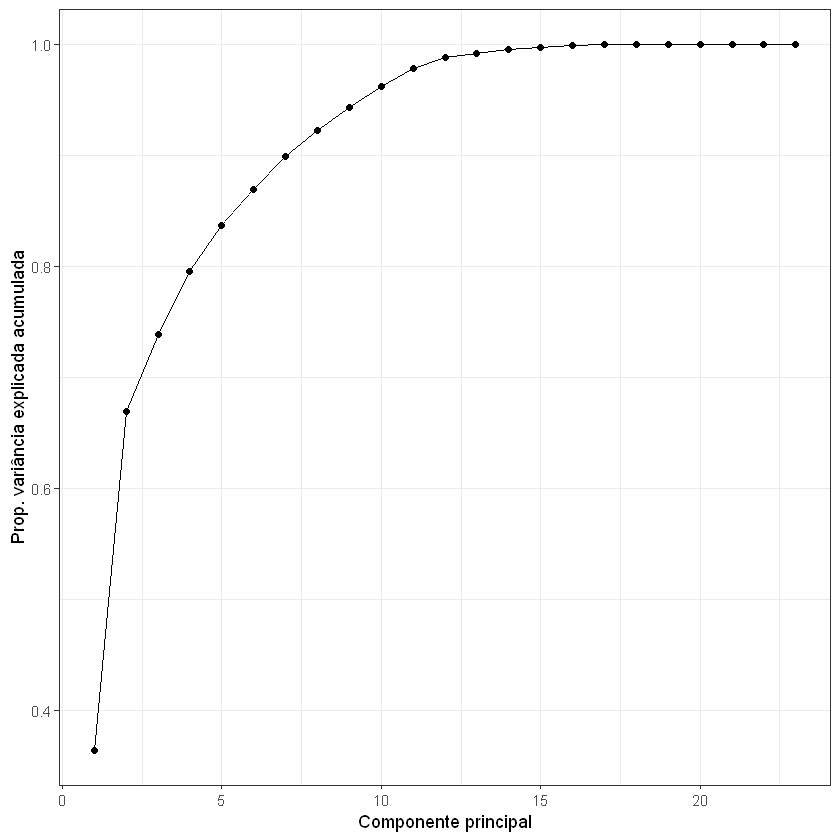

In [38]:
library(ggplot2)
ggplot(data = data.frame(prop_varianza_acum, pc = 1:23),
       aes(x = pc, y = prop_varianza_acum)) +
  geom_point() +
  geom_line() +
  theme_bw() +
  labs(x = "Componente principal",
       y = "Prop. variância explicada acumulada")

### Comentários
9 compoentes seleccionados

In [39]:
compoentes <- data.frame(pc.cr$scores[,1:9])

## 4. Análise de Agrupamentos

In [40]:
#pkgs <- c("factoextra",  "NbClust")
#install.packages(pkgs)
library(factoextra)
library(NbClust)

Warning message:
"package 'factoextra' was built under R version 3.6.2"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


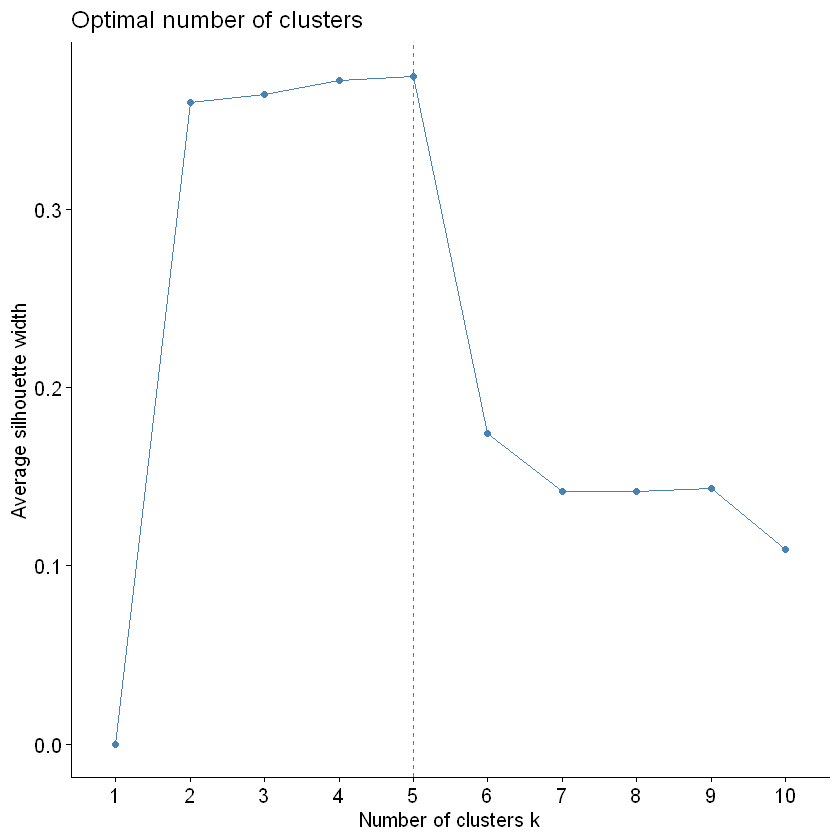

In [41]:
#Cálculo do número de grupos
fviz_nbclust(compoentes, FUN = hcut, method = "silhouette")

In [42]:
#k = 5
distancia <-dist(compoentes, method="euclidean")
grupos<- hclust(d=distancia,method="complete")
segmento <- as.factor(cutree(grupos, k = 5))
summary(grupos.final)

ERROR: Error in summary(grupos.final): objeto 'grupos.final' não encontrado


## 5. Segmentos

### Descritivo dos Segmentos

In [43]:

library("psych")
Case_Data_Science_IBOPE2 <- data.frame(Case_Data_Science_IBOPE,segmento)
describeBy(Case_Data_Science_IBOPE2[, -c(1:2)],Case_Data_Science_IBOPE2$segmento)

Warning message:
"package 'psych' was built under R version 3.6.2"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha




 Descriptive statistics by group 
group: 1
                                                                      vars    n
Área..km².                                                               1 5484
Densidade.demográfica..2000                                              2 5484
Distância.à.capital..km.                                                 3 5484
Esperança.de.vida.ao.nascer..2000                                        4 5484
Mortalidade.até.um.ano.de.idade..2000                                    5 5484
Taxa.de.fecundidade.total..2000                                          6 5484
Percentual.de.pessoas.de.25.anos.ou.mais.analfabetas..2000               7 5484
Renda.per.Capita..2000                                                   8 5484
Índice.de.Gini..2000                                                     9 5484
Intensidade.da.indigência..2000                                         10 5484
Intensidade.da.pobreza..2000                                            11 5

## Municípios dos segmentos 2,3,4, e 5

In [44]:
Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==2,c(2,26)]


,Município,segmento
103,Altamira (PA),2
496,Barcelos (AM),2
3414,Oriximiná (PA),2
4603,São Félix do Xingu (PA),2
4627,São Gabriel da Cachoeira (AM),2
5090,Tapauá (AM),2


In [45]:
Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==3,c(2,26)]


,Município,segmento
585,Belo Horizonte (MG),3
743,Brasília (DF),3
1075,Carapicuíba (SP),3
1488,Curitiba (PR),3
1530,Diadema (SP),3
1808,Fortaleza (CE),3
3226,Nilópolis (RJ),3
3398,Olinda (PE),3
3423,Osasco (SP),3
3897,Porto Alegre (RS),3


In [49]:
Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==4,c(2,26)]
Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==5,c(2,26)]

,Município,segmento
Rio de Janeiro (RJ),Rio de Janeiro (RJ),4


,Município,segmento
São Paulo (SP),São Paulo (SP),5


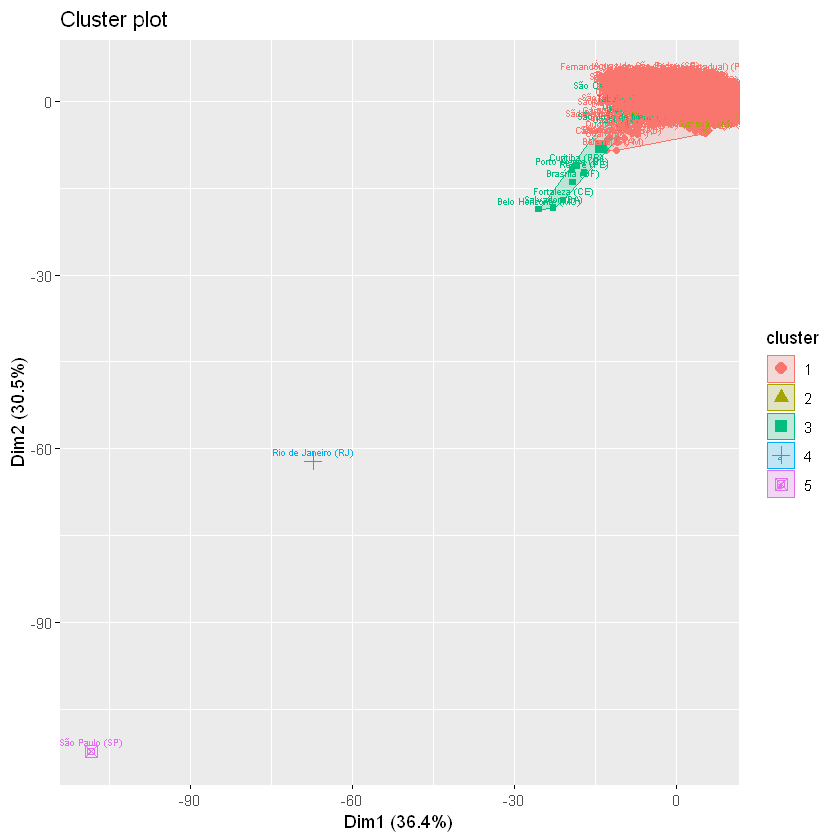

In [50]:
row.names(Case_Data_Science_IBOPE2) <- Case_Data_Science_IBOPE2$Município
fviz_cluster(list(data = Case_Data_Science_IBOPE2[, -c(1:2,26)], cluster = segmento),labelsize = 6)

### Comentário
Os municípios dos grupos 3,4 e 5  devem ser a porta de entrada. por serem os grupos melhor definidos e com melhores indicadores demográficos

## Classificação

* Método usado : Árvore de decisão 

* Em geral a árvore de decisão consegue reproduzir a segmentação dos municipios

In [51]:
#install.packages("codetools",dependencies = TRUE)
library(codetools)
#install.packages("caret",dependencies = TRUE)

library(caret)
library(rpart.plot)
set.seed(3456)
#Construção Amostra de treinamento balanceada

Repeat1 <- function(d, n) {
  return(do.call("rbind", replicate(n, d, simplify = FALSE)))
}

IBOPE.1.FULL <-Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==1,]

index <- sample(1:nrow(IBOPE.1.FULL), 500)

IBOPE.1 <- IBOPE.1.FULL[index, ]

IBOPE.2 <- Repeat1(Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==2,]
                   ,83)

IBOPE.3 <- Repeat1(Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==3,]
                   ,33)


IBOPE.4 <- Repeat1(Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==4,]
,500)

IBOPE.5 <- Repeat1(Case_Data_Science_IBOPE2[Case_Data_Science_IBOPE2$segmento==5,]
                   ,500)


IBOPE.TRAIN <- rbind(IBOPE.1, IBOPE.2, IBOPE.3, IBOPE.4, IBOPE.5)

IBOPE.TRAIN$Código <-as.factor(IBOPE.TRAIN$Código)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Warning message:
"package 'rpart.plot' was built under R version 3.6.2"Loading required package: rpart
Warning message:
"package 'rpart' was built under R version 3.6.2"

In [52]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)

dtree_fit <- train(segmento ~., data = IBOPE.TRAIN[, -c(1,2)], method = "rpart",
                   parms = list(split = "information"),
                   trControl=trctrl,
                   tuneLength = 10)
#names(IBOPE.TRAIN)

dtree_fit$finalModel

n= 2493 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 2493 1993 1 (0.2 0.2 0.2 0.2 0.2)  
  2) População.de.25.anos.ou.mais.de.idade..1991< 2097928 1493  993 1 (0.33 0.33 0.33 0 0)  
    4) Área..km².< 69429.15 995  495 1 (0.5 0 0.5 0 0)  
      8) População.de.25.anos.ou.mais.de.idade..1991< 70770.5 495    0 1 (1 0 0 0 0) *
      9) População.de.25.anos.ou.mais.de.idade..1991>=70770.5 500    5 3 (0.01 0 0.99 0 0) *
    5) Área..km².>=69429.15 498    0 2 (0 1 0 0 0) *
  3) População.de.25.anos.ou.mais.de.idade..1991>=2097928 1000  500 4 (0 0 0 0.5 0.5)  
    6) Área..km².< 1396.35 500    0 4 (0 0 0 1 0) *
    7) Área..km².>=1396.35 500    0 5 (0 0 0 0 1) *

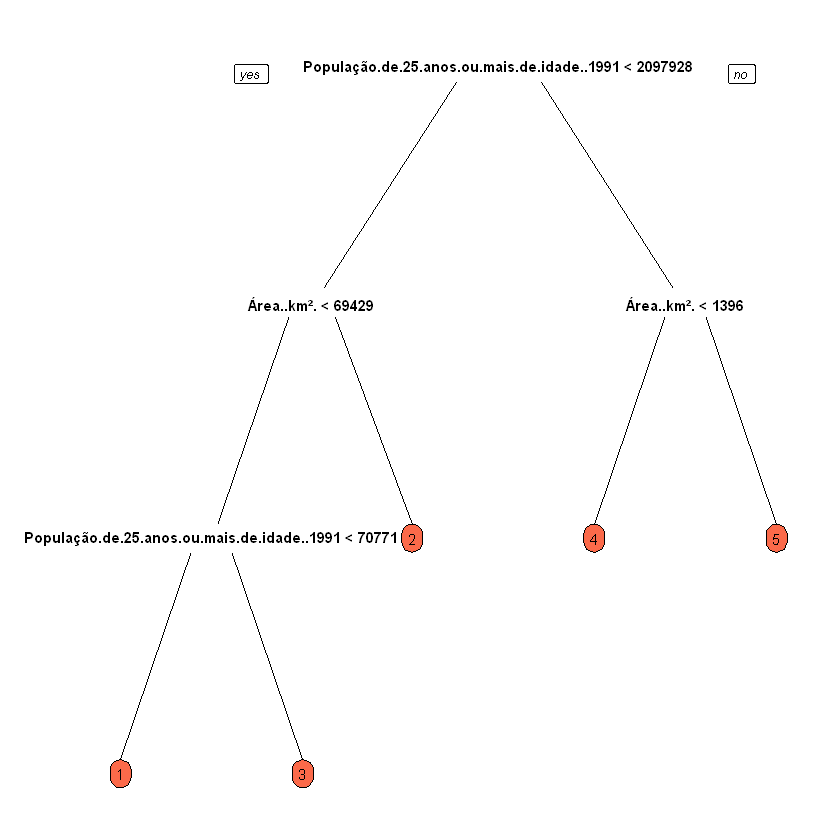

In [53]:
prp(dtree_fit$finalModel,cex = 0.75,box.palette = "Reds",digits=-3, varlen=-50)

In [54]:
#Classificação na base inteira
test_pred <- predict(dtree_fit, newdata = Case_Data_Science_IBOPE2[, -c(1,2)])
confusionMatrix(test_pred, Case_Data_Science_IBOPE2$segmento )  #check acuracidade

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4    5
         1 5384    0    0    0    0
         2    3    6    0    0    0
         3   97    0   15    0    0
         4    0    0    0    1    0
         5    0    0    0    0    1

Overall Statistics
                                         
               Accuracy : 0.9818         
                 95% CI : (0.978, 0.9852)
    No Information Rate : 0.9958         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.3112         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3  Class: 4  Class: 5
Sensitivity            0.9818 1.000000 1.000000 1.0000000 1.0000000
Specificity            1.0000 0.999455 0.982338 1.0000000 1.0000000
Pos Pred Value         1.0000 0.666667 0.133929 1.0000000 1.0000000
Neg Pred Value         0.1870 1.000000